In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\hp\Downloads\salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
#checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
df.shape

(30, 2)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b2f76b7b80>,
 'caps': [<matplotlib.lines.Line2D at 0x2b2f7d78160>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b2f76b78b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b2f7d78700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b2f7d789d0>],
 'means': []}

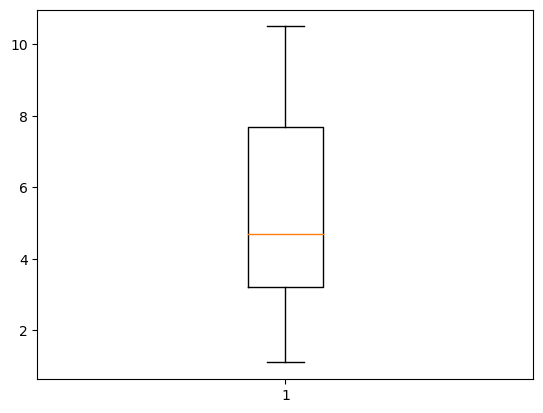

In [6]:
#checkig whether outliers are present
plt.boxplot(df['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2b2f7f6fdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b2f7de4c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b2f7de4460>],
 'medians': [<matplotlib.lines.Line2D at 0x2b2f7df1250>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b2f7df1520>],
 'means': []}

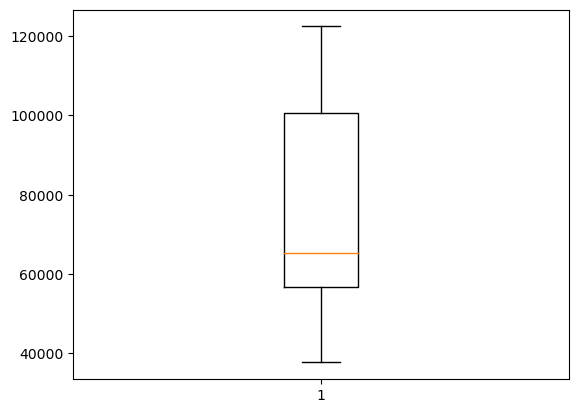

In [7]:
plt.boxplot(df['Salary'])

In [11]:
#Identify input column
X = df[['YearsExperience']]

In [12]:
#Identify output column
y = df['Salary']

In [9]:
#splitting the data
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [14]:
X_train.shape

(21, 1)

In [15]:
X_test.shape

(9, 1)

In [16]:
#Importing linear regression class
from sklearn.linear_model import LinearRegression

In [17]:
#create an object
lr = LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
#y=mx+c
#m is slope ==> coeffiecint
#c is intercept
print(lr.intercept_)
print(lr.coef_)

26049.577715443353
[9202.23359825]


In [20]:
#x-train
X_train

,YearsExperience
22,7.9
23,8.2
4,2.2
2,1.5
25,9.0
6,3.0
18,5.9
13,4.1
7,3.2
27,9.6


In [21]:
y_train

22    101302
23    113812
4      39891
2      37731
25    105582
6      60150
18     81363
13     57081
7      54445
27    112635
1      46205
16     66029
0      39343
15     67938
29    121872
28    122391
9      57189
8      64445
12     56957
11     55794
5      56642
Name: Salary, dtype: int64

In [23]:
lr.predict([[7.9]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([98747.22314165])

In [24]:
train_pred = lr.predict(X_train)
train_pred

array([ 98747.22314165, 101507.89322113,  46294.4916316 ,  39852.92811283,
       108869.68009974,  53656.27851021,  80342.75594515,  63778.73546829,
        55496.72522986, 114391.02025869,  38012.48139317,  72980.96906654,
        36172.03467352,  71140.52234689, 122673.03049712, 120832.58377747,
        60097.84202899,  55496.72522986,  62858.51210846,  62858.51210846,
        52736.05515038])

In [25]:
test_pred = lr.predict(X_test)
test_pred

array([ 74821.41578619,  91385.43626305,  61938.28874864,  81262.97930497,
        67459.62890759,  88624.76618357, 113470.79689886,  44454.04491195,
       106109.01002026])

In [26]:
y_test

17     83088
21     98273
10     63218
19     93940
14     61111
20     91738
26    116969
3      43525
24    109431
Name: Salary, dtype: int64

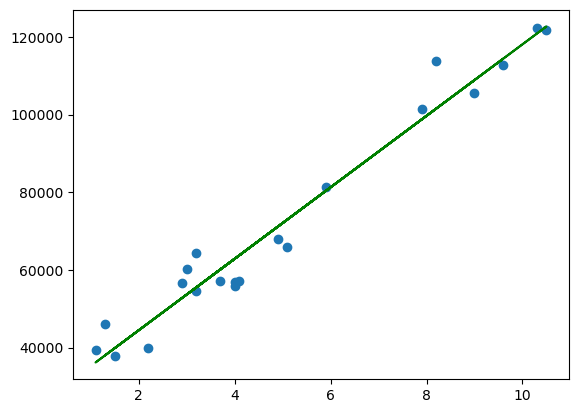

In [29]:
#Visulaize the train data
plt.scatter(X_train,y_train)
plt.plot(X_train,train_pred,color='g')
plt.show()

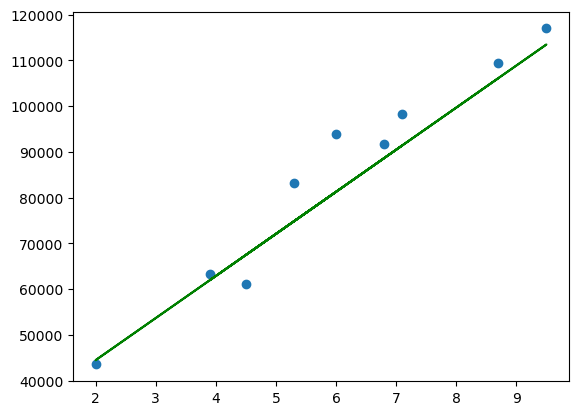

In [30]:
#Visulaize the train data
plt.scatter(X_test,y_test)
plt.plot(X_test,test_pred,color='g')
plt.show()

In [31]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Evaluation metric
1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error ==> sqrt(MSE)

In [32]:
#MAE
from sklearn.metrics import mean_absolute_error

In [33]:
mean_absolute_error(y_test,test_pred)

5146.886734888234

In [34]:
#MSE
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(y_test,test_pred)

39139215.99958858

In [36]:
#RMSE
np.sqrt(mean_squared_error(y_test,test_pred))

6256.134269625979

### performance metrics
1. R-2 score
2. Adjusted R-2 score

In [37]:
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test,test_pred)

0.9248580247217075

Model is working with 92% accuracy.so,we can go forward with this model